# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)

## Can you improve the algorithm that changed the world of real estate?

Zillow’s Zestimate home valuation has shaken up the U.S. real estate industry since first released 11 years ago.

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important. The Zestimate was created to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

Zillow Prize, a competition with a one million dollar grand prize, is challenging the data science community to help push the accuracy of the Zestimate even further. Winning algorithms stand to impact the home values of 110M homes across the U.S.

In this million-dollar competition, participants will develop an algorithm that makes predictions about the future sale prices of homes. The contest is structured into two rounds, the qualifying round which opens May 24, 2017 and the private round for the 100 top qualifying teams that opens on Feb 1st, 2018. In the qualifying round, you’ll be building a model to improve the Zestimate residual error. In the final round, you’ll build a home valuation algorithm from the ground up, using external data sources to help engineer new features that give your model an edge over the competition.

Because real estate transaction data is public information, there will be a three-month sales tracking period after each competition round closes where your predictions will be evaluated against the actual sale prices of the homes. The final leaderboard won’t be revealed until the close of the sales tracking period.

### Import dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

In [2]:
properties=pd.read_csv('properties_2016.csv')
train=pd.read_csv('train_2016_v2.csv', parse_dates=["transactiondate"])

/Users/chenyinglong/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
properties.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [4]:
whole_df=pd.merge(properties, train, on = 'parcelid')

In [5]:
whole_df.dtypes

parcelid                                 int64
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt                            float64
garagecarcnt                           float64
garagetotalsq

### Exploratory Data Analysis

**Target variable**:

In [6]:
whole_df['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

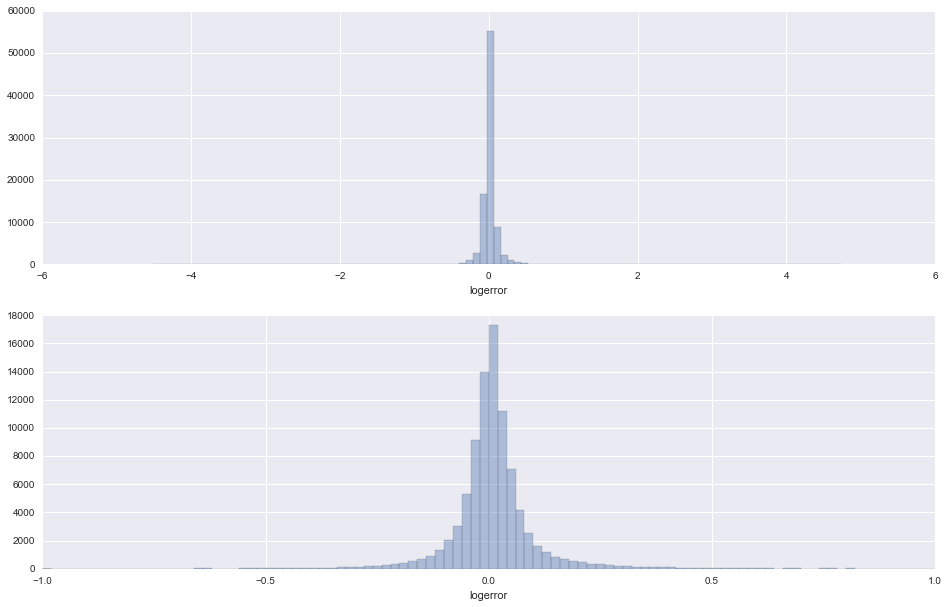

In [7]:
fig = plt.figure(2, figsize=(16, 10))
plt.subplot(211)
#sns.set(rc={"figure.figsize": (16, 8)})
sns.distplot(whole_df['logerror'],bins=100,kde=False)#,hist_kws={"range": [-2,2]})
plt.subplot(212)
#sns.set(rc={"figure.figsize": (16, 8)})
sns.distplot(whole_df['logerror'],bins=100,kde=False, hist_kws={"range": [-1,1]})

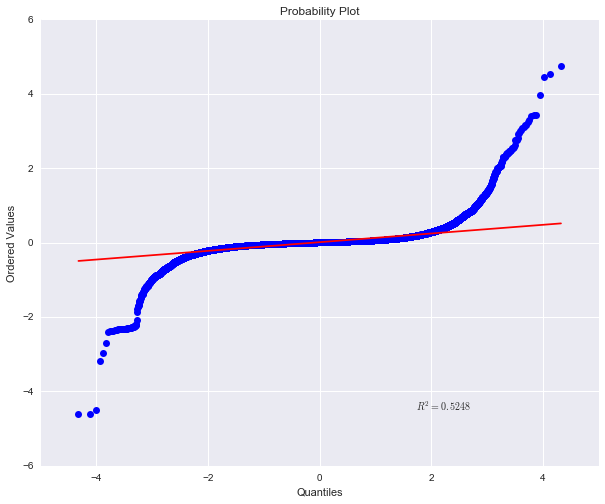

In [8]:
plt.figure(figsize=(10, 8))
res = stats.probplot(whole_df['logerror'], plot=plt)

From the above plots, we see that the target distribution is close to normal. 

**Drop outliers**:

From q-q plot we see that the outliers are the sources of devitation from normal distribution. So we will drop outliers based on percentiles and see how it improves the normality.

In [9]:
ulimit = np.percentile(whole_df.logerror.values, 99)
llimit = np.percentile(whole_df.logerror.values, 1)

whole_df.drop(whole_df[whole_df.logerror>ulimit].index,inplace=True)
whole_df.drop(whole_df[whole_df.logerror<llimit].index,inplace=True)

Let us re-check normality:

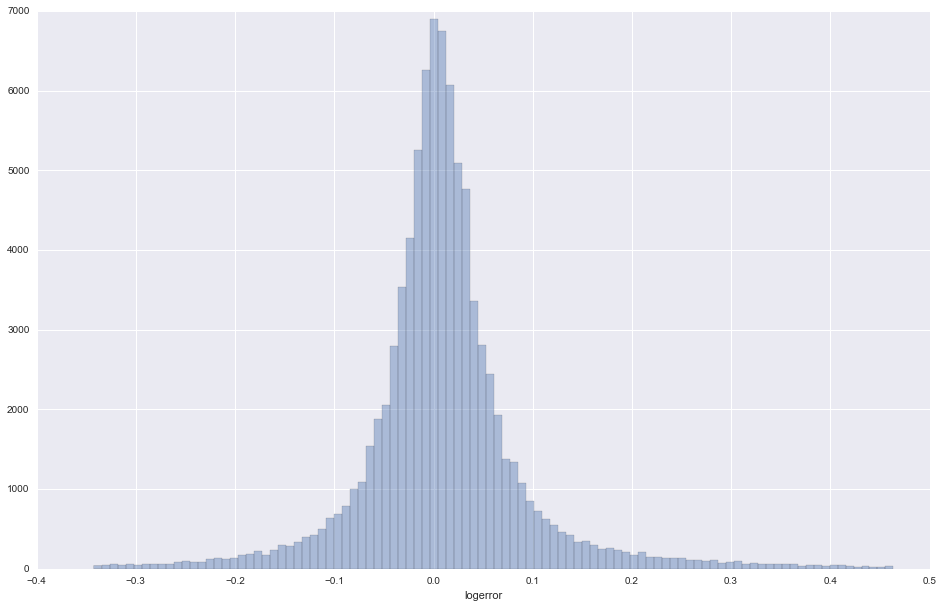

In [10]:
fig = plt.figure(figsize=(16, 10))
#sns.set(rc={"figure.figsize": (16, 8)})
sns.distplot(whole_df['logerror'],bins=100,kde=False)#,hist_kws={"range": [-2,2]})

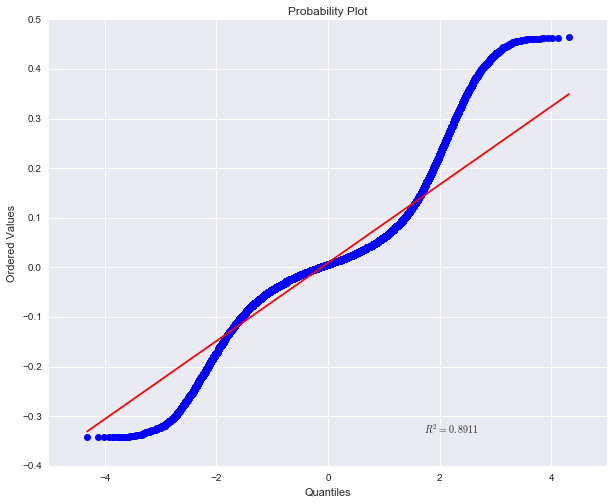

In [11]:
plt.figure(figsize=(10, 8))
res = stats.probplot(whole_df['logerror'], plot=plt)

We can also check the skewness of logerror:

In [77]:
print("Skewness: %f" % whole_df['logerror'].skew())

Skewness: 0.708343


In [97]:
from scipy.stats import skew
sqrt_log_error=np.sqrt(whole_df['logerror']+0.6)
skew(sqrt_log_error)

0.0009715750906540903

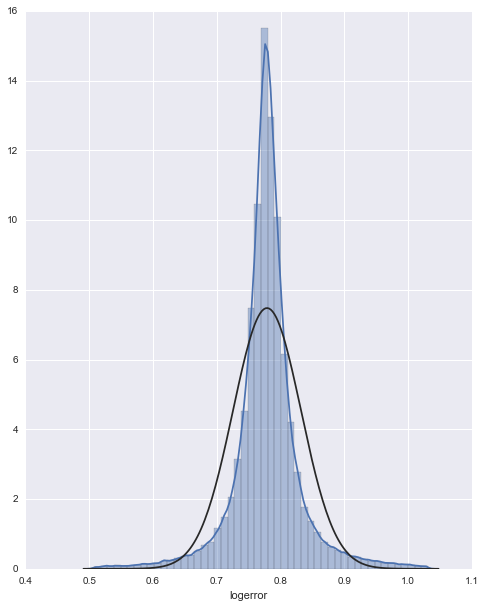

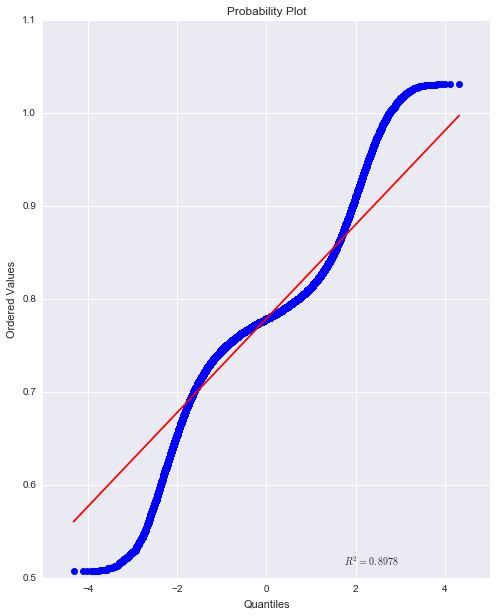

In [98]:
#transformed histogram and normal probability plot
from scipy.stats import norm
sns.distplot(sqrt_log_error, fit=norm);
fig = plt.figure()
res = stats.probplot(sqrt_log_error, plot=plt)

Since the data is not badly skewed, so I will give up the sqrt transformation for the moment. We doublecheck the number of rows to make sure most useful data are kept:

In [99]:
whole_df.shape

(88473, 58)

**Missing data**:

In [12]:
missing_df = whole_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')[::-1]
missing_df = missing_df.reset_index(drop=True)
missing_df['missing_percent']=100*missing_df['missing_count']/whole_df.shape[0]

In [13]:
missing_df

,column_name,missing_count,missing_percent
0,buildingclasstypeid,88461,99.986437
1,finishedsquarefeet13,88443,99.966091
2,basementsqft,88432,99.953658
3,storytypeid,88432,99.953658
4,yardbuildingsqft26,88382,99.897144
5,fireplaceflag,88253,99.751337
6,architecturalstyletypeid,88214,99.707255
7,typeconstructiontypeid,88176,99.664304
8,finishedsquarefeet6,88083,99.559188
9,decktypeid,87826,99.268703


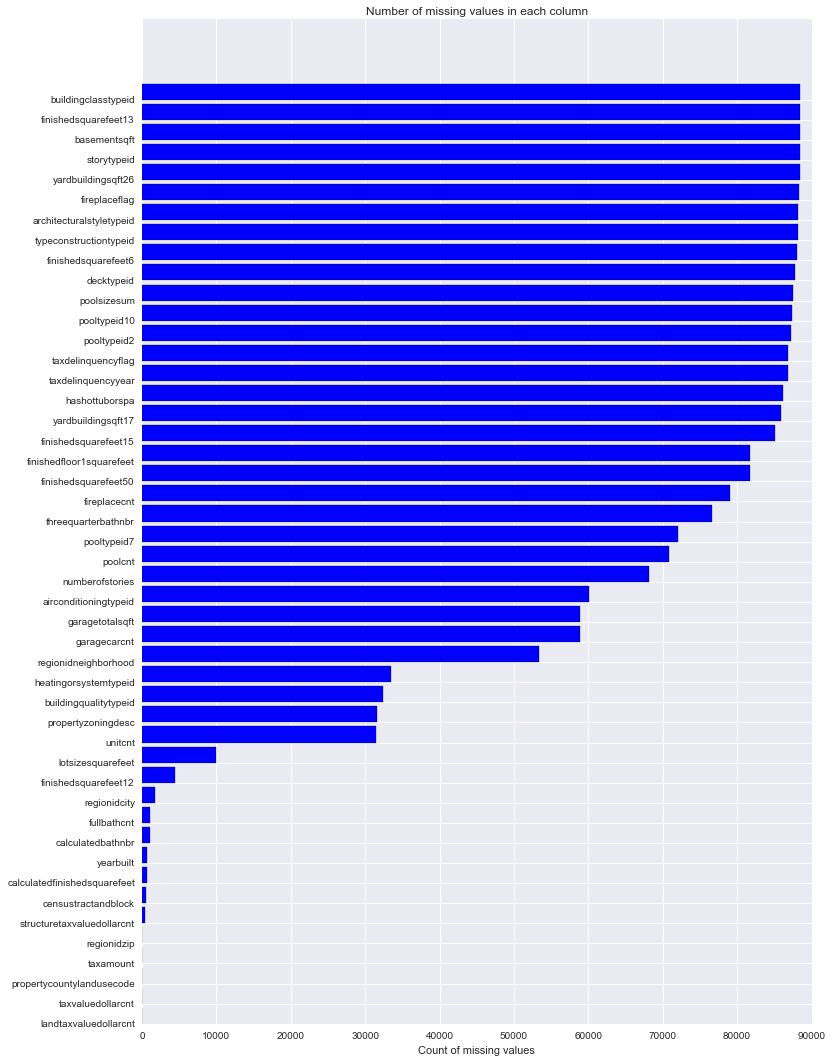

In [14]:
missing_df=missing_df.sort_values(by='missing_count')
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

We see that a lot of features contain a huge proportion of missing data. Some of them are categorical and the others are numerical. We will examine them one by one to see if we want to drop or speculating on the imputing value.

**Time distribution**:

Let me first check the year:

In [15]:
whole_df['transactiondate'].dt.year.unique()

array([2016])

Only 2016 data is available. Then we move on to month distribution

In [16]:
whole_df['transaction_month'] = whole_df['transactiondate'].dt.month

In [17]:
cnt_srs=whole_df['transaction_month'].value_counts()

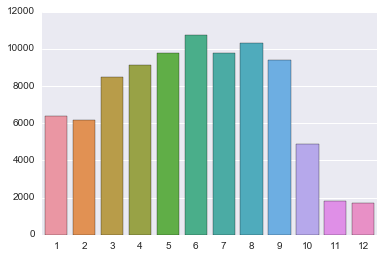

In [18]:
sns.barplot(cnt_srs.index, cnt_srs.values)

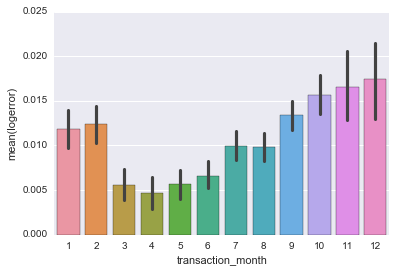

In [19]:
sns.barplot(whole_df['transaction_month'], whole_df['logerror'])

**Numerical features**:

In [20]:
numerical_features=whole_df.drop('logerror',axis=1).select_dtypes(include=['float64','int64']).keys()

We first examine how the correlation between target variable and the numerical_features

In [21]:
numerical_features.values

array(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt',
       'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedo

In [22]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = whole_df.mean(axis=0)
whole_df_new = whole_df.fillna(mean_values, inplace=True)

corr_df=[]
for item in numerical_features.values:
    corr_df.append(np.corrcoef(whole_df_new[item],whole_df_new['logerror'])[0,1])
corr_df = pd.DataFrame({'col_labels':numerical_features, 'corr_values':corr_df})
corr_df = corr_df.sort_values(by='corr_values')

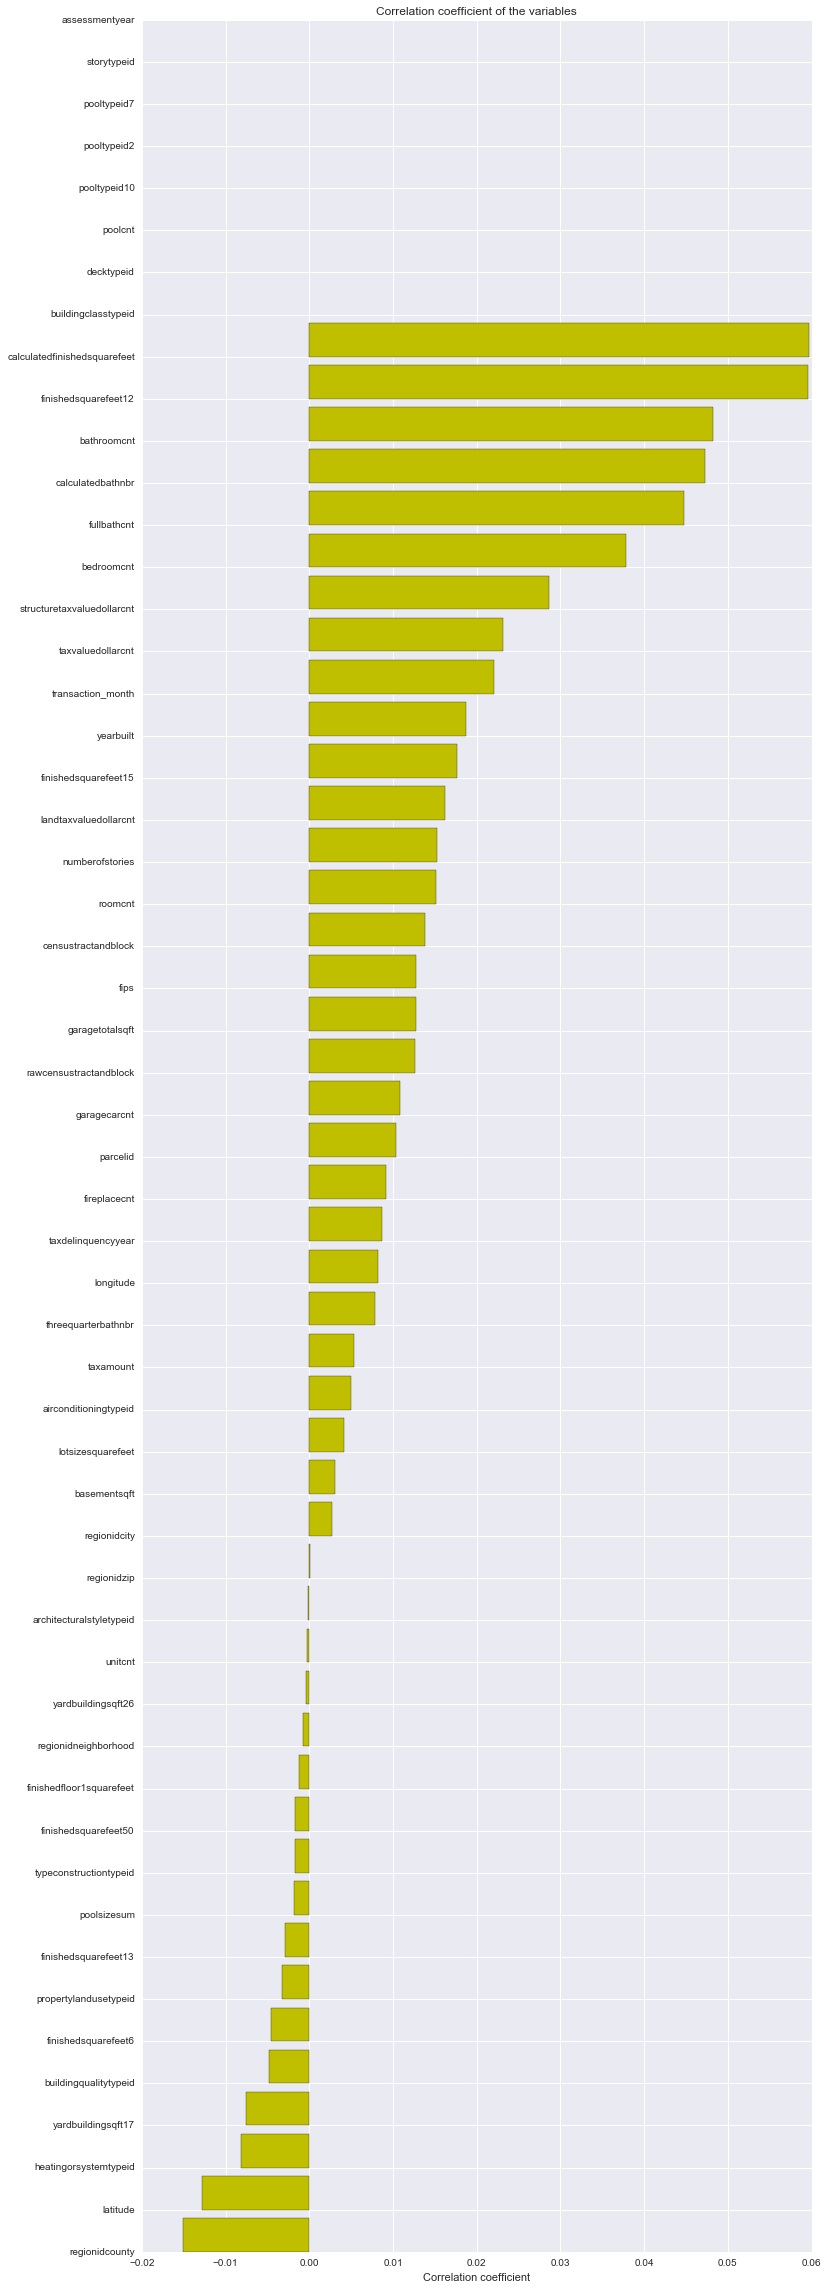

In [23]:
ind = np.arange(len(numerical_features))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

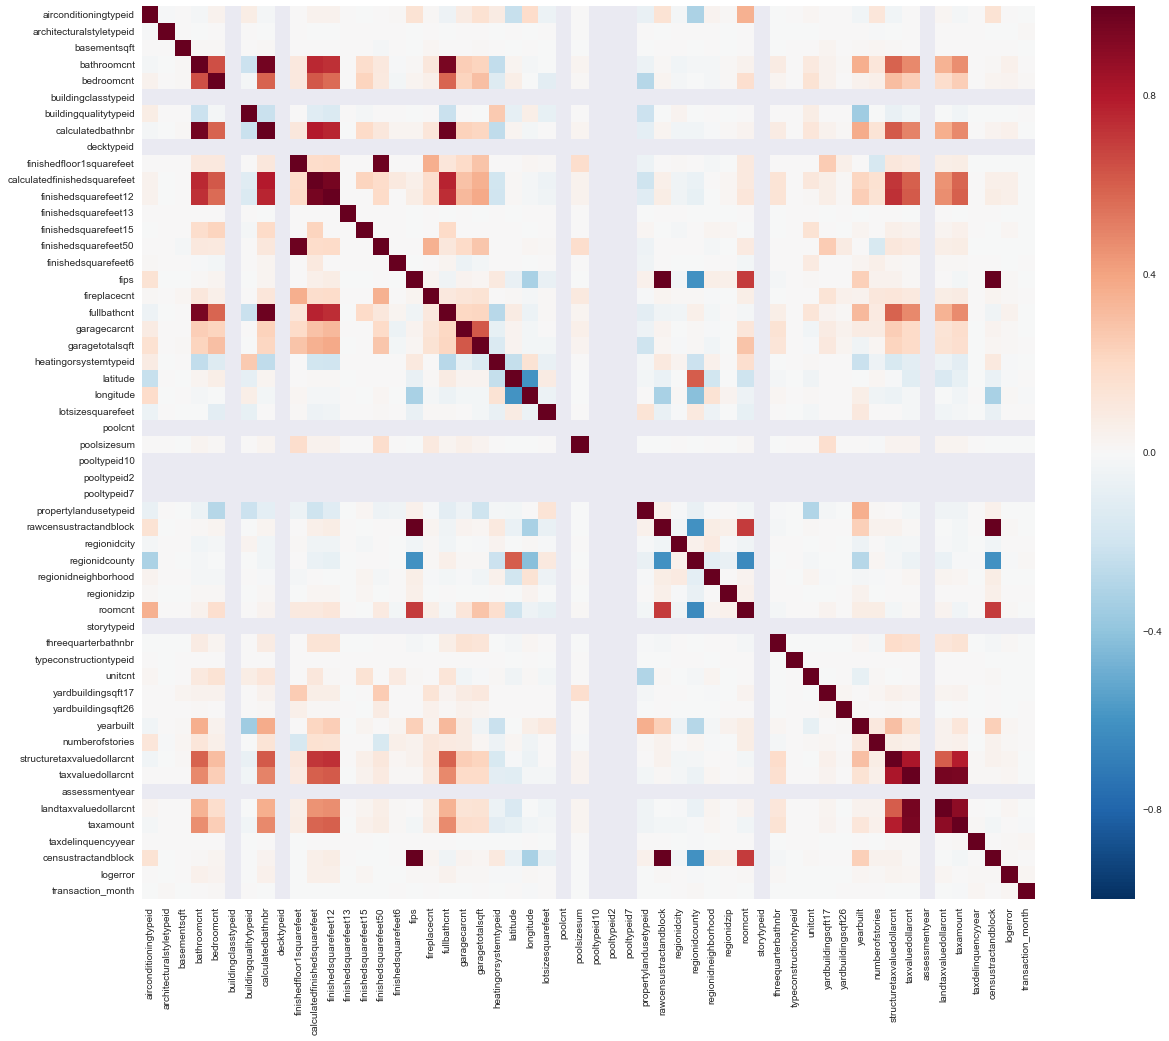

In [24]:
corr = whole_df.select_dtypes(include=['float64','int64']).iloc[:,1:].corr() # remove id column  
sns.set(rc={"figure.figsize": (20, 16)})
sns.heatmap(corr,square=True)

In [25]:
cor_dict=corr[['logerror']].dropna()['logerror'].to_dict()
del cor_dict['logerror'] # remove correlation with itself
print("List the numerical features decendingly by their correlation with logerror:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with logerror:

calculatedfinishedsquarefeet: 	0.0597251117535
finishedsquarefeet12: 	0.0595215815773
bathroomcnt: 	0.048270889144
calculatedbathnbr: 	0.0472277839631
fullbathcnt: 	0.044782334964
bedroomcnt: 	0.0378538291517
structuretaxvaluedollarcnt: 	0.028581939572
taxvaluedollarcnt: 	0.0230930336987
transaction_month: 	0.022110675136
yearbuilt: 	0.0187592556694
finishedsquarefeet15: 	0.0176719671492
landtaxvaluedollarcnt: 	0.0162318569575
numberofstories: 	0.0152827943766
regionidcounty: 	-0.0151033341751
roomcnt: 	0.0150936200429
censustractandblock: 	0.0138198887897
latitude: 	-0.0127813443291
fips: 	0.0127482184295
garagetotalsqft: 	0.0127157508603
rawcensustractandblock: 	0.0126231426284
garagecarcnt: 	0.0108732240345
fireplacecnt: 	0.00910066895714
taxdelinquencyyear: 	0.00862439450796
longitude: 	0.00816223860089
heatingorsystemtypeid: 	-0.00813620895116
threequarterbathnbr: 	0.00785711850219
yardbuildingsqft17: 	-0

From the above small correlation coefficients, we list out the items that the housing price has a strong correlation with. But it is worth checking whether those features are highly correlated or not.

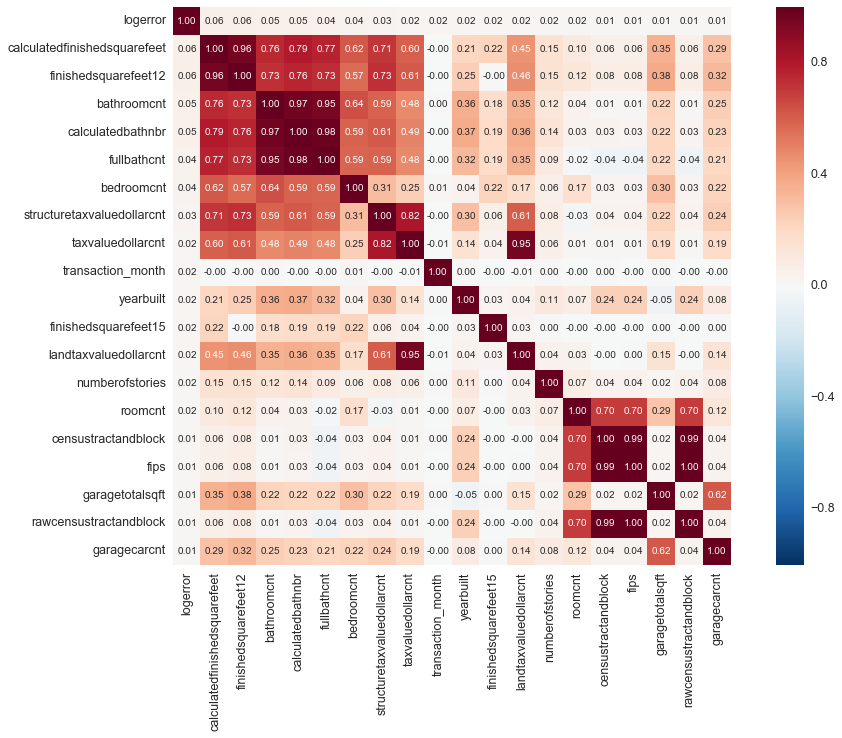

In [26]:
k=20
cols=corr.nlargest(k,'logerror')['logerror'].index
cm=np.corrcoef(whole_df[cols].values.T)
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.25)
sns.heatmap(cm,annot=True,annot_kws={'size': 10},fmt='.2f',square=True,yticklabels=cols.values,xticklabels=cols.values)

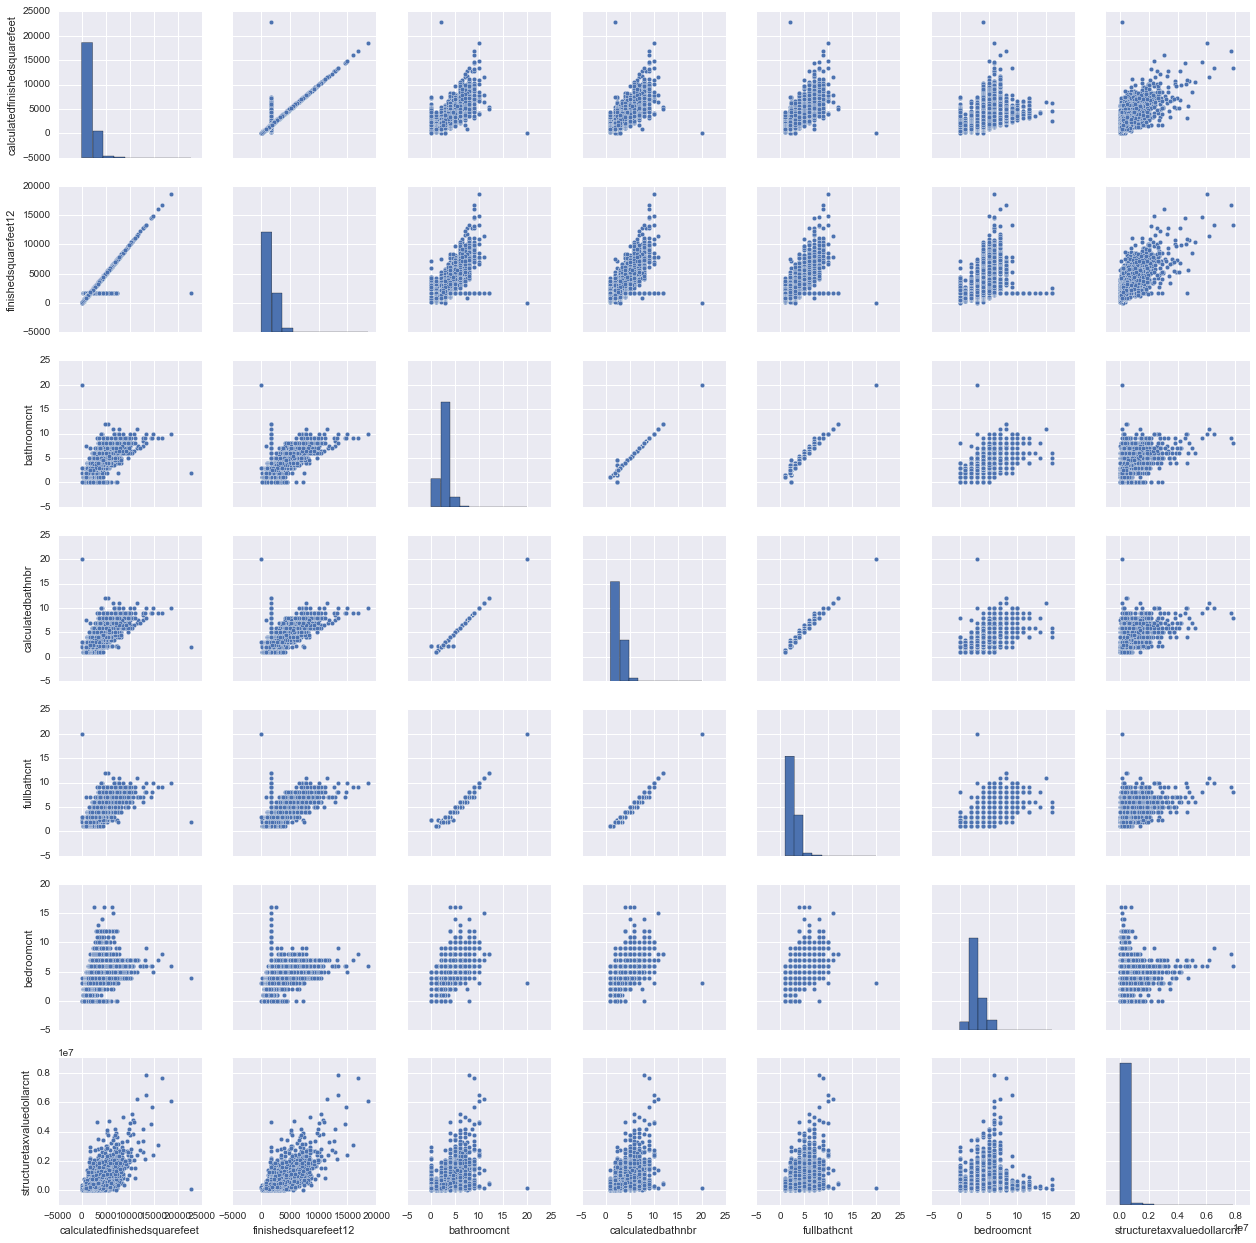

In [27]:
sns.set()
sns.pairplot(whole_df[cols[1:8]], size = 2.5)
plt.show();

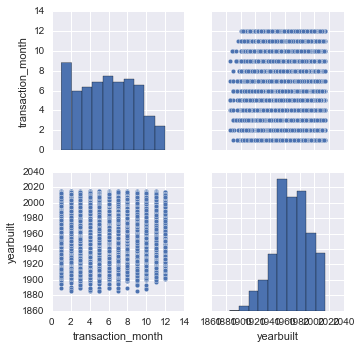

In [28]:
sns.set()
sns.pairplot(whole_df[cols[9:11]], size = 2.5)
plt.show();

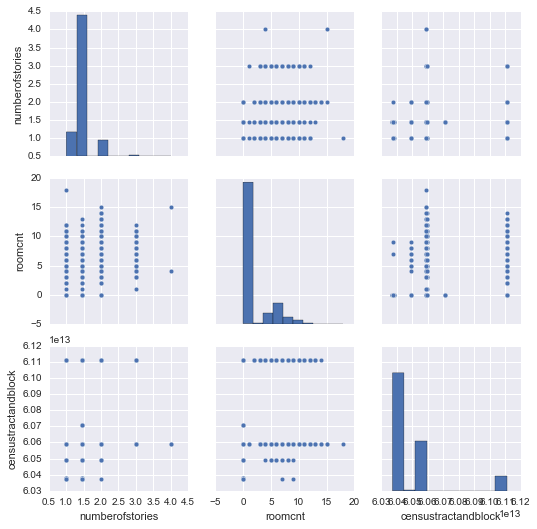

In [29]:
sns.set()
sns.pairplot(whole_df[cols[13:16]], size = 2.5)
plt.show();

**Categorical features**:

In [30]:
categorical_features=whole_df.select_dtypes(include=['object']).keys()

In [31]:
whole_df[categorical_features].dtypes

hashottuborspa               object
propertycountylandusecode    object
propertyzoningdesc           object
fireplaceflag                object
taxdelinquencyflag           object
dtype: object

* **hashottuborspa**

In [32]:
whole_df['hashottuborspa'].unique()

array([nan, True], dtype=object)

/Users/chenyinglong/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2756: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


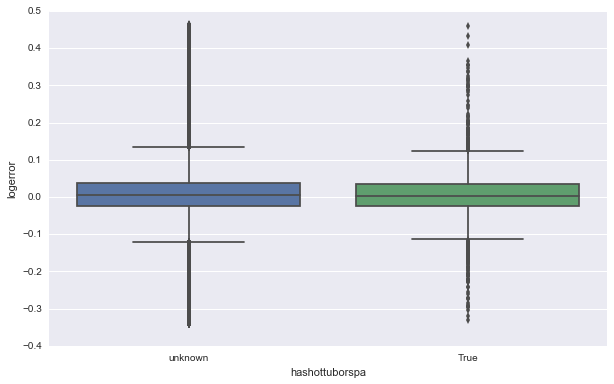

In [33]:
df=whole_df[['hashottuborspa','logerror']]
df.fillna('unknown',inplace=True)
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'hashottuborspa', y = 'logerror',  data = df)

* **propertycountylandusecode**

In [34]:
whole_df['propertycountylandusecode'].unique()

array(['1128', '1129', '1111', '1110', '010C', '0100', '0101', '010D',
       '010E', '0200', '0700', '0400', '0300', '122', '34', '01DC', '1',
       '012C', '100V', '1117', '0104', '020G', '0109', '96', '1321',
       '010V', '01HC', '1222', '1116', '010M', '1210', '010G', '0103',
       '38', '010H', '73', '1112', '0108', '135', '010F', '1014', '1410',
       '012D', '0201', '6050', '070D', '1720', '020M', '105', '012E',
       '1012', '1011', '1310', '010', '040V', '030G', '0110', '0102',
       '1421', '0303', '0111', '0130', '1333', '0401', '0', '0210', '0131',
       '8800', '0301', '1420', nan, '0114'], dtype=object)

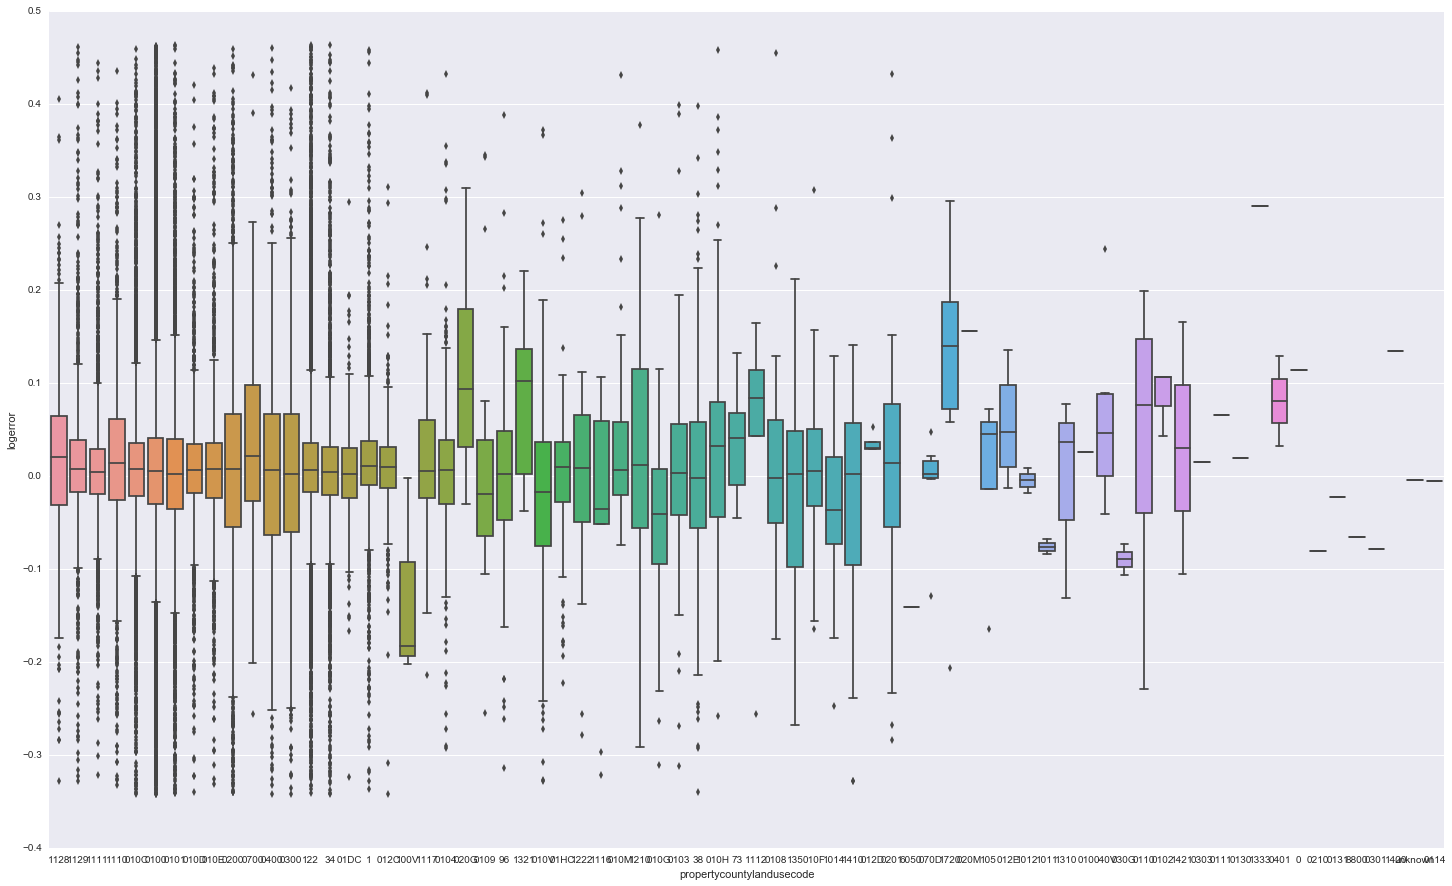

In [35]:
df=whole_df[['propertycountylandusecode','logerror']]
df.fillna('unknown',inplace=True)
plt.figure(figsize = (25, 15))
sns.boxplot(x = 'propertycountylandusecode', y = 'logerror',  data = df)

* **propertyzoningdesc**

In [36]:
whole_df['propertyzoningdesc'].unique()

array([nan, 'LARD3', 'LARS', ..., 'ARR0*', 'LBPD25', 'LBCHW'], dtype=object)

In [37]:
len(whole_df['propertyzoningdesc'].unique())

1971

* **fireplaceflag**

In [38]:
whole_df['fireplaceflag'].unique()

array([nan, True], dtype=object)

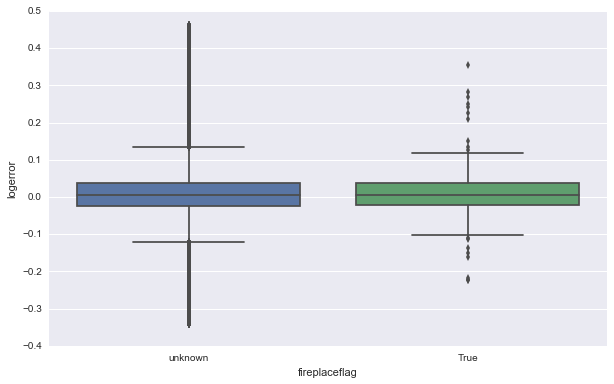

In [39]:
df=whole_df[['fireplaceflag','logerror']]
df.fillna('unknown',inplace=True)
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fireplaceflag', y = 'logerror',  data = df)

* **taxdelinquencyflag**

In [40]:
whole_df['taxdelinquencyflag'].unique()

array([nan, 'Y'], dtype=object)

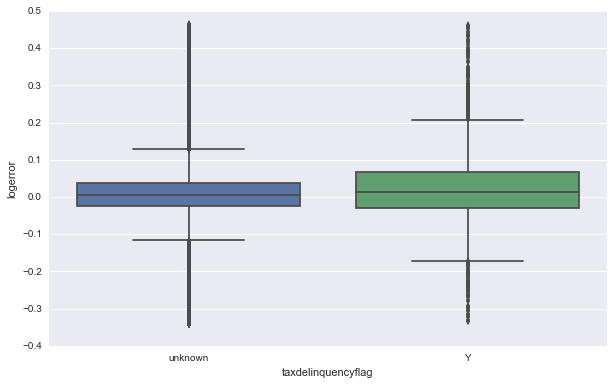

In [41]:
df=whole_df[['taxdelinquencyflag','logerror']]
df.fillna('unknown',inplace=True)
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'taxdelinquencyflag', y = 'logerror',  data = df)

In [42]:
len(whole_df['transactiondate'].unique())

352

**Drop features**:

In [43]:
whole_df=whole_df.drop(['propertycountylandusecode','propertyzoningdesc','transactiondate'], axis=1)

**One-hot encoding**:

In [44]:
whole_df = pd.get_dummies(whole_df)

In [45]:
whole_df.keys()

Index([u'parcelid', u'airconditioningtypeid', u'architecturalstyletypeid',
       u'basementsqft', u'bathroomcnt', u'bedroomcnt', u'buildingclasstypeid',
       u'buildingqualitytypeid', u'calculatedbathnbr', u'decktypeid',
       u'finishedfloor1squarefeet', u'calculatedfinishedsquarefeet',
       u'finishedsquarefeet12', u'finishedsquarefeet13',
       u'finishedsquarefeet15', u'finishedsquarefeet50',
       u'finishedsquarefeet6', u'fips', u'fireplacecnt', u'fullbathcnt',
       u'garagecarcnt', u'garagetotalsqft', u'heatingorsystemtypeid',
       u'latitude', u'longitude', u'lotsizesquarefeet', u'poolcnt',
       u'poolsizesum', u'pooltypeid10', u'pooltypeid2', u'pooltypeid7',
       u'propertylandusetypeid', u'rawcensustractandblock', u'regionidcity',
       u'regionidcounty', u'regionidneighborhood', u'regionidzip', u'roomcnt',
       u'storytypeid', u'threequarterbathnbr', u'typeconstructiontypeid',
       u'unitcnt', u'yardbuildingsqft17', u'yardbuildingsqft26', u'yearbuilt',
 

In [46]:
X = whole_df.drop(['parcelid','logerror'],axis=1)
y = whole_df['logerror']

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Models**:

In [48]:
def MAE(y_pred, y_true):
    return np.mean(abs(y_pred-y_true))

**Ridge and Lasso**:

In [49]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [50]:
model_ridge = Ridge()

alphas = range(300,400,10)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

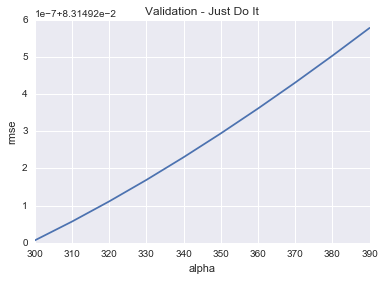

In [51]:
import matplotlib.pyplot as plt
% matplotlib inline

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [52]:
l2=np.argmin(cv_ridge)

In [53]:
np.min(cv_ridge)

0.083149206547189422

Test score:

In [54]:
best_model_ridge=Ridge(alpha=l2)

In [55]:
best_model_ridge.fit(X_train, y_train)

Ridge(alpha=300, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
y_train_pred=best_model_ridge.predict(X_train)
y_test_pred=best_model_ridge.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train_pred,y_train)), np.sqrt(mean_squared_error(y_test_pred,y_test))

(0.083051802556759785, 0.082759146850593324)

In [58]:
MAE(y_train_pred, y_train), MAE(y_test_pred, y_test)

(0.05301752014519125, 0.053000691365987805)

In [59]:
alphas = [0.0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

/Users/chenyinglong/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/chenyinglong/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/chenyinglong/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


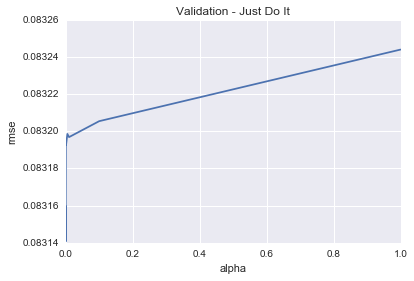

In [60]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [61]:
model_lasso = LassoCV(alphas = [0.0,0.0001,0.0002,0.0003,0.0004], cv=5).fit(X_train, y_train)

/Users/chenyinglong/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


In [62]:
rmse_cv(model_lasso)

array([ 0.08386268,  0.08297656,  0.08347284,  0.08240973,  0.08302048])

In [63]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [64]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 36 variables and eliminated the other 20 variables


In [65]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

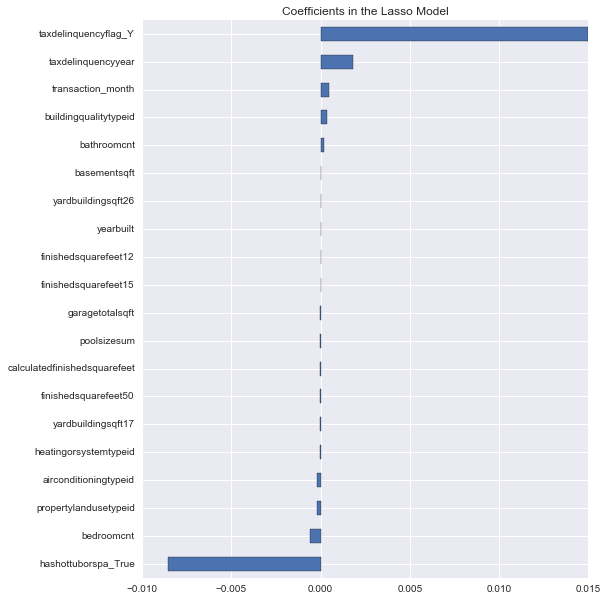

In [66]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [67]:
y_train_pred=model_lasso.predict(X_train)
y_test_pred=model_lasso.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(y_train_pred,y_train)), np.sqrt(mean_squared_error(y_test_pred,y_test))

(0.083065583754878256, 0.082768773404369986)

In [69]:
MAE(y_train_pred, y_train), MAE(y_test_pred, y_test)

(0.05302084477605773, 0.05300370489281678)

**xgboost**:

In [70]:
import xgboost as xgb

In [71]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

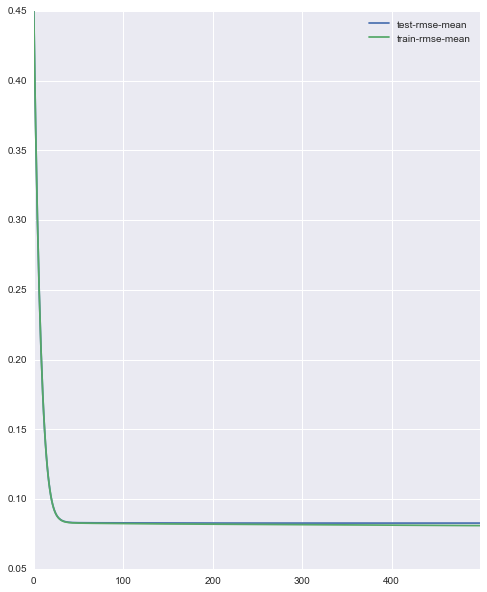

In [72]:
model.loc[:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [73]:
model_xgb = xgb.XGBRegressor(max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [74]:
y_train_pred=model_xgb.predict(X_train)
y_test_pred=model_xgb.predict(X_test)

In [75]:
np.sqrt(mean_squared_error(y_train_pred,y_train)), np.sqrt(mean_squared_error(y_test_pred,y_test))

(0.082551600324186764, 0.082376525294613465)

In [76]:
MAE(y_train_pred, y_train), MAE(y_test_pred, y_test)

(0.05267911076207284, 0.052721994350184924)